# Transfer formula
Minimum transfer szenario:

account A (slightly) below keep (this is the transfer trigger):
$$total_A \leq keep_A$$

other accounts equal: 
$$\forall_{i \neq A}: total_i = \frac{total - total_A}{N-1}$$

minimum transfer size: 


$$
\begin{align}
minSize & \geq keep_A + \frac{total_i - keep_i + total_A - keep_A}{2} - total_A \\
	& \geq \frac{total_i - keep_i}{2} \\
	& = \frac{\frac{total - total_A}{N-1} - keep_i}{2} \\
    & \geq \frac{\frac{total - keep_A}{N-1} - keep_i}{2} \\
    & \geq \frac{\frac{total - max(keep_i)}{N-1} - max(keep_i)}{2} \\
	& = \frac{total - N*max(keep_i)}{2N-2}
\end{align}
$$
    


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

def minSize(total, maxKeep, N):
    return np.divide((total - np.multiply(N, maxKeep)), 2*N-2)

def doPlot(ax, N, maxKeep, minTransfer, freeFloatingShare=0.5):
    ax.plot(N, maxKeep, '--bo', label='keep')
    ax.plot(N, minTransfer, '--rs', label='minTransfer')
    ax.plot(N, np.divide(np.ones(np.size(N)), N), '--gd', label='avg keep_i')
    ax.legend()
    ax.set_title("assets not in keep: {:2.0f}%".format(freeFloatingShare*100))
    ax.set_xlabel('# accounts (=marketplaces)')
    ax.set_ylabel('amount of total assets in currency')
    ax.grid(True)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:2.0f}%'.format(x*100) for x in vals])
    

C:\Users\e502692\AppData\Local\Temp\ipykernel_27632\3793942770.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:2.0f}%'.format(x*100) for x in vals])
C:\Users\e502692\AppData\Local\Temp\ipykernel_27632\3793942770.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:2.0f}%'.format(x*100) for x in vals])
C:\Users\e502692\AppData\Local\Temp\ipykernel_27632\3793942770.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:2.0f}%'.format(x*100) for x in vals])


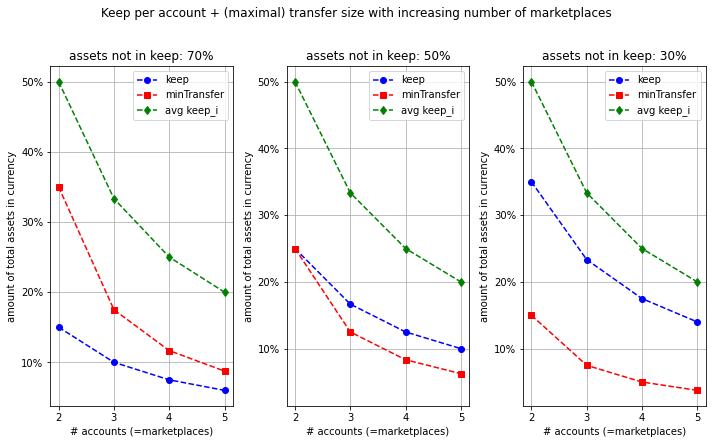

In [2]:
total = 1
N = np.arange(2, 6)


fig = plt.figure(figsize=(10, 6))

i=1
freeFloatingShare = 0.7 # always have half floating
maxKeep = (1-freeFloatingShare) * total/N 
minTransfer = minSize(total, maxKeep, N)
ax = fig.add_subplot(1, 3, i)
doPlot(ax, N, maxKeep, minTransfer, freeFloatingShare)
i = i+1

freeFloatingShare = 0.5 # always have half floating
maxKeep = (1-freeFloatingShare) * total/N 
minTransfer = minSize(total, maxKeep, N)
ax = fig.add_subplot(1, 3, i)
doPlot(ax, N, maxKeep, minTransfer, freeFloatingShare)
i = i+1

freeFloatingShare = 0.3 # always have half floating
maxKeep = (1-freeFloatingShare) * total/N 
minTransfer = minSize(total, maxKeep, N)
ax = fig.add_subplot(1, 3, i, sharey=ax)
doPlot(ax, N, maxKeep, minTransfer, freeFloatingShare)


# Show the plot
fig.suptitle('Keep per account + (maximal) transfer size with increasing number of marketplaces', y=1.02)
fig.tight_layout()
plt.show()

In [3]:
from ipywidgets import interact, interactive, fixed, interact_manual, widgets
import ipywidgets as widgets

    
@interact(total='0.82', keepPercentage=(0, 1.0, 0.01), N=(2,5))
def update(total, keepPercentage, N):
    minTransfer = minSize(float(total), float(total)*keepPercentage, N)
    print('total       : {}'.format(total))
    print('keep_i (abs): {:.3}'.format(float(total)*keepPercentage))
    print('minTransfer : {:.3}'.format(minTransfer))
    print('N           : {}'.format(N))



interactive(children=(Text(value='0.82', description='total'), FloatSlider(value=0.5, description='keepPercent…

# Assumptions

1. No rate/fee change between trades and transfers.
2. Equal weights.
3. Disregard transfer time (always $avail_i = total_i$)
4. Strategy: `AssureMinStrategy`

# Notation

Everything always refers to one specific currency.

| term | definition | configuration |
|:--- |:---|:---|
| $minSize$ | minimum transfer size in currency | `transfer.minSize.CURRENCY` <br> _Note: this is only a safety measure, the factual minimum transfer size will be as calculated above!_ |
| $total_i$ | total available assets in account $i$ (incl. reservered and pendig) | |
| $total$ | total available assets (incl. reservered and in transfer) | |
| $avail_i$ | available assets in account $i$ | |
| $keep_i$ | minimum assets we want to keep (available) in account $i$ | `transfer.keep.minInCurrency.CURRENCY` |
| $keep$ | $=\sum_i(keep_i)$ | |
| $N$ | number of (active) accounts in currency | |
